<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: _______</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


# Ayudantía
## 1.1 Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>

## 1.2 Aplique la transformada rápida de fourier a una señal de audio
<p align="justify">
El archivo de audio debe ser formato .WAV, con menos de 30 segundo de duración.


##Librerias

In [169]:
#Librerias de la actividad 3
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from IPython.display import Audio
import torch
from scipy.signal import butter, filtfilt, freqz

##Resolución 1.1

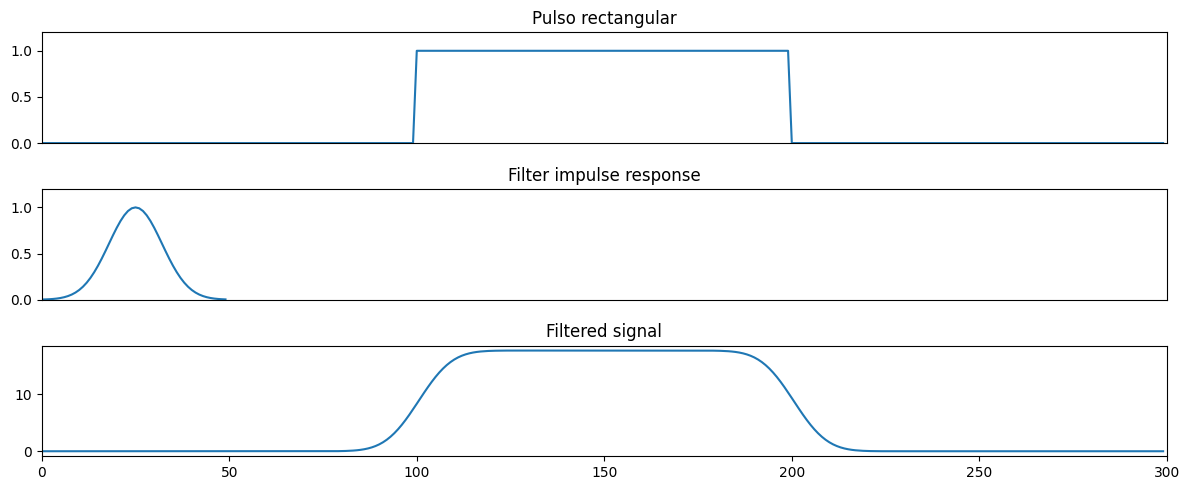

In [116]:

#Creamos el pulso rectangular, siendo 0 en todos sus valores excepto en el intervalo de 100 a 200
pulso = np.zeros(300)
pulso[100:200] = 1

#Impulso gaussiano centrado en 0, tiene 50 muestras
impulso = np.exp(-0.01 * np.arange(-25, 25)**2)

#Convolución centrada
filtered_signal = signal.convolve(pulso, impulso, mode='same')

# Gráfica
plt.figure(figsize=(12, 5))

plt.subplot(3, 1, 1)
plt.plot(pulso)
plt.title("Pulso rectangular")
plt.ylim(0, 1.2)
plt.xlim(0, 300)
plt.xticks([])


#Desfazamos el impulso para que sea mas visible sin afectar el calculo matematico
plt.subplot(3, 1, 2)
plt.plot(np.arange(len(impulso)), impulso)  #Usamos np.arange para igualar las coordenadas de impulso
plt.title("Filter impulse response")
plt.ylim(0, 1.2)
plt.xlim(0, 300)
plt.xticks([])

plt.subplot(3, 1, 3)
plt.plot(filtered_signal)
plt.title("Filtered signal")
plt.xlim(0, 300)

plt.tight_layout()
plt.show()



##Resolución 1.2

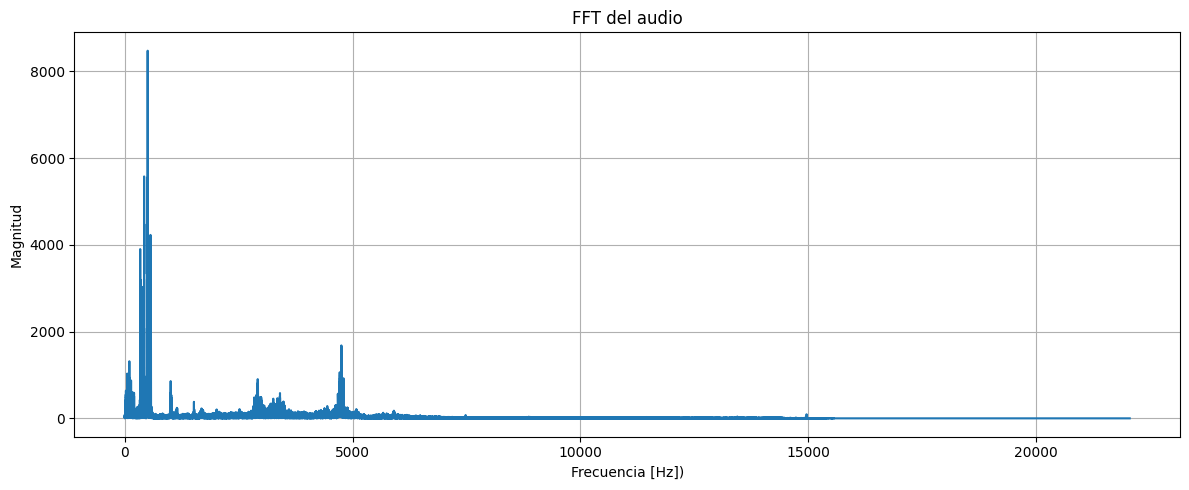

In [172]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fft import fft, fftfreq

#Cargar el archivo de audio
sample, data = wavfile.read("Audio.wav")  #sample = frecuencia de muestreo
skip = 7*sample #saltamos al segundo 7 para evitar los momentos de bajo volumen o sin ruido como los primeros 5
data = data[skip:]

#Si el audio tiene 2 canales como en estereo, tomamos solo uno
if len(data.shape) == 2:
    data = data[:, 0]  #Tomamos solo el canal izquierdo




#Normalizamos los datos para evitar problemas en caso de numeros float
data = data / np.max(np.abs(data))

#Aplicamos la FFT
D = len(data) #Numero de muestras
fftD = fft(data) #Transformada de Fourier
fftfreq = fftfreq(D, 1/sample) #Frecuencias

#Tomamos solo la mitad positiva
HD = D // 2
fftfreq = fftfreq[:HD]
fftD = np.abs(fftD[:HD]) #Magnitud

#Graficamos el espectro de frecuencias
plt.figure(figsize=(12, 5))
plt.plot(fftfreq, fftD)
plt.title("FFT del audio")
plt.xlabel("Frecuencia [Hz])")
plt.ylabel("Magnitud")
plt.grid()
plt.tight_layout()
plt.show()

Audio(data, rate=sample)

## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


In [119]:
#Definimos los parametros de las señales
#Definimos las frecuencias
f1 = 5 #Hz
f2 = 10 #Hz
#Definimos el tiempo
t=np.linspace(0,2,1000)
#Escribimos las componentes de la suma
sen1 = np.sin(2* np.pi *f1*t)
sen2 = np.sin(2* np.pi *f2*t)
#Definimos la señal
sig = sen1 + sen2

#Creamos señal de ruido Gaussiano
ruido = np.random.normal(0, 0.5, t.shape)  #random.normal trabaja con distribución gaussiana, definimos media 0 con desviación 0.5
#.shape ajusta el tamaño de ruido para que coincida con la variable t

#Señal con ruido Gaussiano
señalRuido = sig + ruido

#Calculamos el valor medio de la señal
valorM = np.mean(señalRuido)
print("El valor medio de la señal con ruido es", valorM)


El valor medio de la señal con ruido es -0.00109674705747301


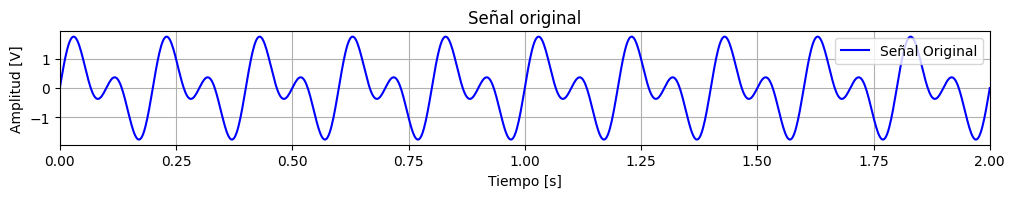

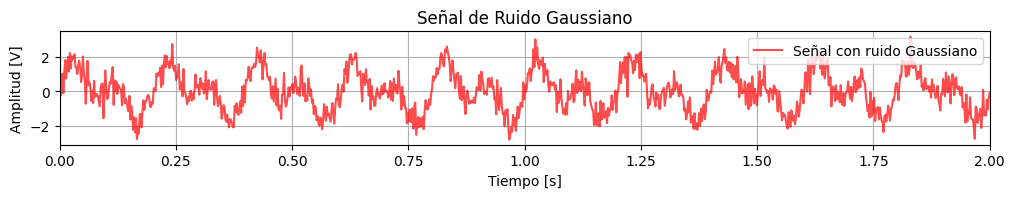

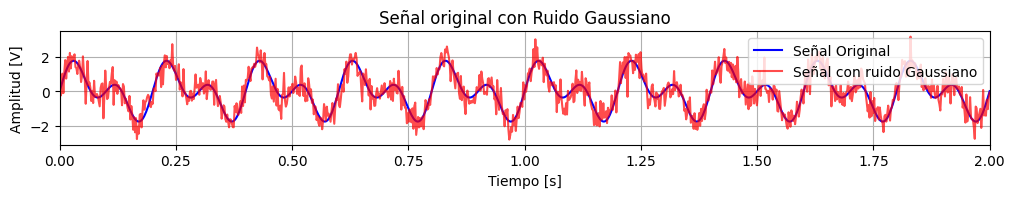

In [120]:
#Graficamos las señales
plt.figure(figsize=(12, 5))
plt.subplot(3, 1, 1)
plt.plot(t, sig, label="Señal Original", color='b')
plt.xlabel("Tiempo [s]")
plt.xlim(t[0], t[-1])
plt.ylabel("Amplitud [V]")
plt.title("Señal original")
plt.legend()
plt.grid()

plt.figure(figsize=(12, 5))
plt.subplot(3, 1, 2)
plt.plot(t, señalRuido, label="Señal con ruido Gaussiano", color='r', alpha=0.7)
plt.xlabel("Tiempo [s]")
plt.xlim(t[0], t[-1])
plt.ylabel("Amplitud [V]")
plt.title("Señal de Ruido Gaussiano")
plt.legend()
plt.grid()

plt.figure(figsize=(12, 5))
plt.subplot(3, 1, 3)
plt.plot(t, sig, label="Señal Original", color='b')
plt.plot(t, señalRuido, label="Señal con ruido Gaussiano", color='r', alpha=0.7)
plt.xlabel("Tiempo [s]")
plt.xlim(t[0], t[-1])
plt.ylabel("Amplitud [V]")
plt.title("Señal original con Ruido Gaussiano")
plt.legend()
plt.grid()

plt.show()

In [141]:
import numpy as np

def DFT(x):
    """
    Esta función se encarga de calcular la transformada la Transformada Discreta
    de Fourier (DFT) de una señal

    Parametros:
    x : Datos de la señal
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)

    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi * k * n / N)
    return X

#Calculamos la DFT de la señal con ruido
DFTR = DFT(señalRuido)

#Calculamos el largo de t
l = len(t)

#Calculo de la densidad espectral de potencia.
PSD = DFTR * np.conj(DFTR) / l

#Creamos el vector para las frecuencias, definimos una frecuencia de muestreo
freq = (1/sample) * np.arange(l)
L = np.arange(1, np.floor(l/2), dtype = "int")








## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [132]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    """
    Esta función se encarga de implementar la wavelet de mexican hat solicitada
    por el profesor

    Parametros:
    x: El eje X de la función
    mu: El valor central medio de la wavelet
    sigma: La desviación estandar de la wavelet
    """
    coef = 2 / (np.sqrt(3 * sigma * np.pi))
    exp_part = np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    wavelet = coef * (1 - ((x - mu) ** 2) / sigma ** 2) * exp_part
    return wavelet

#Definimos los parametros de la wavelet
x = np.linspace(-10, 10, 1000) #Asignamos el rango de valores a x
mu = 0
sigma = 1

#Calculamos la wavelet
sombrero = mexican_hat(x, mu, sigma)




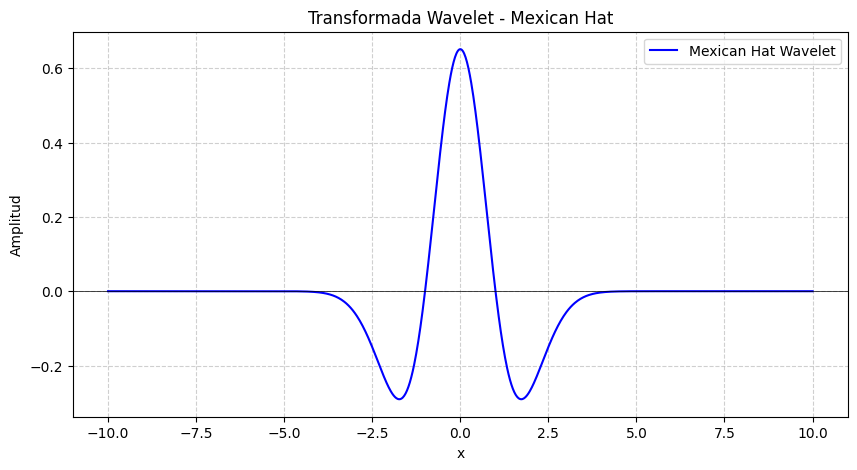

In [133]:
#Graficamos la funcion
plt.figure(figsize=(10, 5))
plt.plot(x, sombrero, label="Mexican Hat Wavelet", color="blue")
plt.title("Transformada Wavelet - Mexican Hat")
plt.xlabel("x")
plt.ylabel("Amplitud")
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', lw=0.5)
plt.legend()
plt.show()

### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

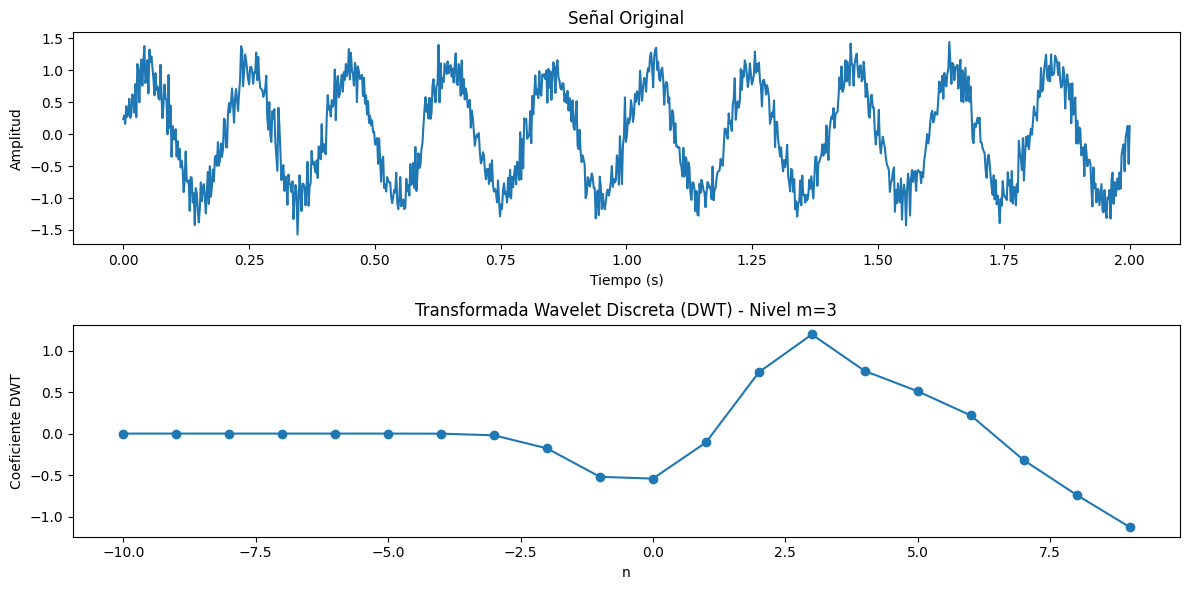

In [164]:
import numpy as np
import matplotlib.pyplot as plt

# Función Mexican Hat (Sombrero Mexicano)
def mexican_hat(x):
    return (2 / np.sqrt(3 * np.pi)) * (1 - x ** 2) * np.exp(-x ** 2 / 2)

# Función para calcular la Transformada Wavelet Discreta (DWT)
def dwt_discreta(signal, m, n, a0=2, b0=1):
    """
    Calcula la transformada wavelet discreta para una señal

    Parametros:
    signal: La señal a utilizar
    m: Nivel de escala
    n: Desplazamiento
    a0: Parametro de escala
    b0: Parametro para el posicionamiento

    Retorna:
    float: El coeficiente de la transformada en (m, n).
    """
    # Calculamos los parámetros a y b
    a = a0 ** m
    b = n * b0 * a0 ** m

    # Generamos los valores de la wavelet escalada y desplazada
    x = np.arange(len(signal))
    wavelet = (a ** (-0.5)) * mexican_hat((x - b) / a)

    # Calculamos la transformada como la sumatoria (discreta)
    dwt_value = np.sum(signal * wavelet)
    return dwt_value

# Definimos una señal de ejemplo (seno de 5 Hz + ruido)
t = np.linspace(0, 2, 1000)
signal = np.sin(2 * np.pi * 5 * t) + np.random.normal(0, 0.2, t.shape)

# Calculamos la transformada para varios valores de m y n
m = 3
n_values = range(-10, 10)
dwt_values = [dwt_discreta(signal, m, n) for n in n_values]

# Graficamos la señal y su transformada
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, signal)
plt.title("Señal Original")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")

plt.subplot(2, 1, 2)
plt.plot(n_values, dwt_values, marker='o')
plt.title(f"Transformada Wavelet Discreta (DWT) - Nivel m={m}")
plt.xlabel("n")
plt.ylabel("Coeficiente DWT")

plt.tight_layout()
plt.show()


###  3.2.1. Explica el siguiente fragmento de código en detalle

In [171]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()





TypeError: mexican_hat() takes 1 positional argument but 3 were given

Explicación: El codigo mostrado implementa la función psi_mn, la cual genera una wavelet escalada y desplazada. En cuanto a los parametros, tenemos que m es el parametro que controla el tamaño de la wavelet, es decir la escala. Mientras tanto n se encarga de controlar el desplazamiento de la función. Dada la forma en que estan definidos "a" y "b" de forma que se mantenga cierta relación en base a los cambios de "m". Es decir que al aumentar la escala, los pasos de traslación también se agrandan, lo cual es una propiedad de las transformadas de wavelet para mantener cierta "uniformidad".

La función "np.interp" permite reescalar la wavelet de forma continua.




### 3.2.2 completa el siguiente código para realizar la transformada


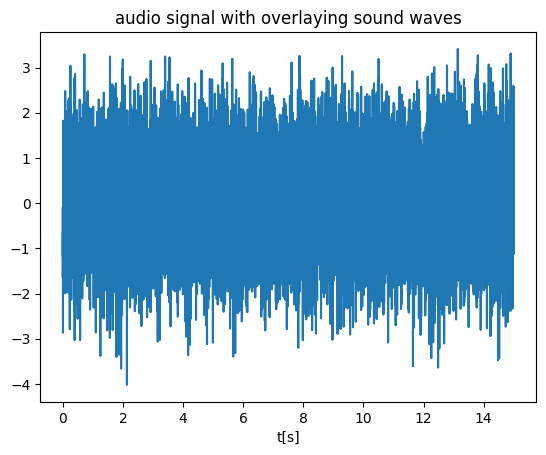

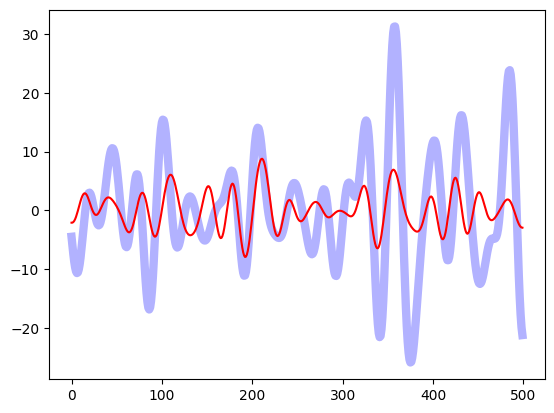

In [160]:

def mexican_hat(x):
    return (1 - x**2) * np.exp(-x**2 / 2)

psi = mexican_hat(np.linspace(-5, 5, 100))


"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = f[::2**m]
    transform_scaled =  2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)
    return transform_scaled

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)
    transform = 2**(-m/2) * np.sum(f[:len(pmn)] * pmn)
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.sin(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res, audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()



### 3.3 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

In [145]:
#Instalamos la librería PyWavelets en Colab
!pip install PyWavelets

[-0.3  -0.14 -0.41 -0.46]


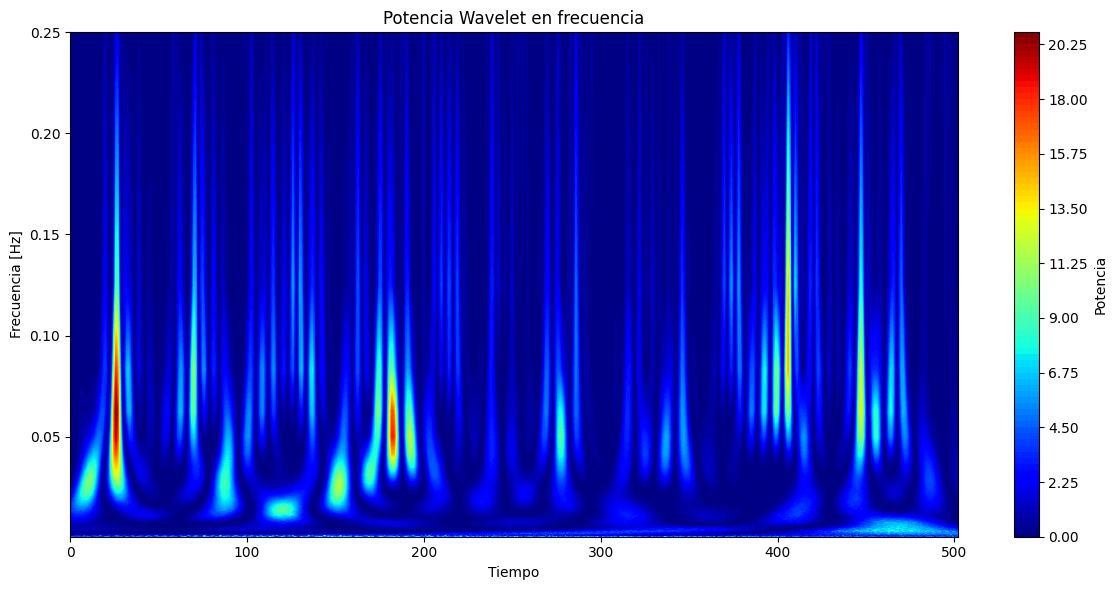

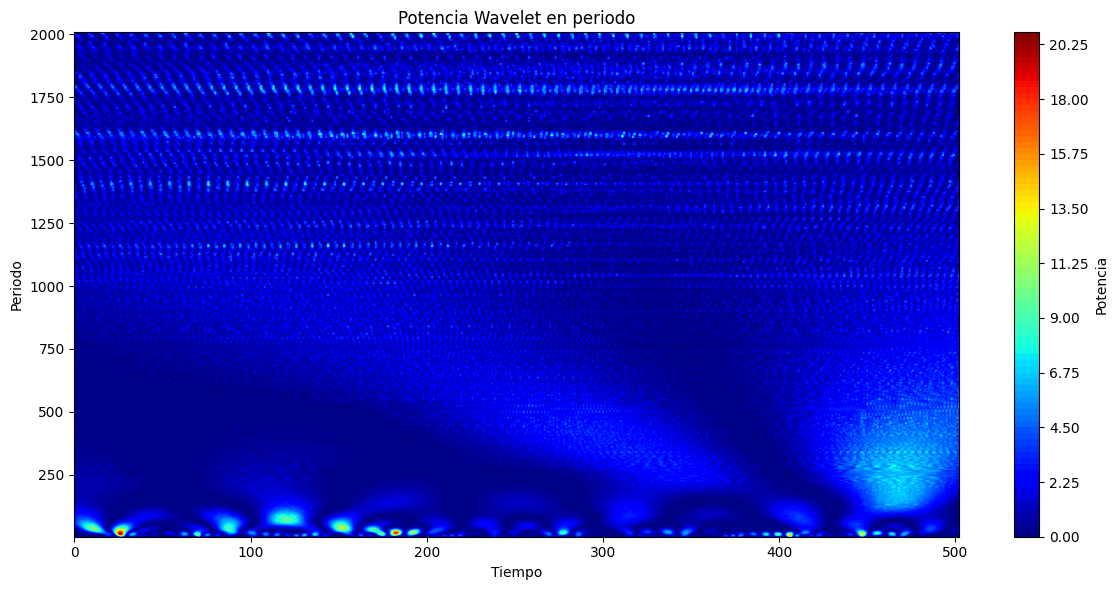

In [146]:
import pywt
import pandas as pd

link = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat"

#Leemos los datos del link
datos = pd.read_table(link)

#Obtenemos los datos del link como un array
array = datos.values.squeeze()
print(array[:4]) #Probamos que funcione bien con los primeros 4 datos

#Aplicamos pywt.cwt a los datos, junto al wavelet
coe, fre = pywt.cwt(data=array, scales = np.arange(1, len(array)), wavelet = "mexh") #"mexh" define el uso de la mexican hat

#Convertimos los datos a potencia
potencia = (abs(coe))**2

#Graficamos en el dominio de la frecuencia
plt.figure(figsize=(12, 6))
plt.contourf(np.arange(len(array)), fre, potencia, 100, cmap='jet')
plt.title("Potencia Wavelet en frecuencia")
plt.ylabel("Frecuencia [Hz]")
plt.xlabel("Tiempo")
plt.colorbar(label='Potencia')
plt.tight_layout()
plt.show()

#Graficamos en el dominio del periodo
plt.figure(figsize=(12, 6))
plt.contourf(np.arange(len(array)), 1/fre, potencia, 100, cmap='jet')
plt.title("Potencia Wavelet en periodo")
plt.ylabel("Periodo")
plt.xlabel("Tiempo")
plt.colorbar(label='Potencia')
plt.tight_layout()
plt.show()


### 3.4 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.

##Explicación de resultados:

El gráfico de contorno presenta la potencia correspondiente a los coeficientes de la wavelet, tenemos dos graficos, uno respecto a frecuencias y el otro respecto al periodo.

Se puede observar claramente que realizarlo respecto a las frecuencias presenta un grafico más facil de analizar, mostrando los niveles más altos de energia con "peaks" claramente visibles.

## 4. Obtén el espectrograma de tu señal de audio
Sobre la señal de audio en el punto 1 de la actividad, debe presentar el espectragrama


In [147]:
!pip install librosa
import librosa
import librosa.display

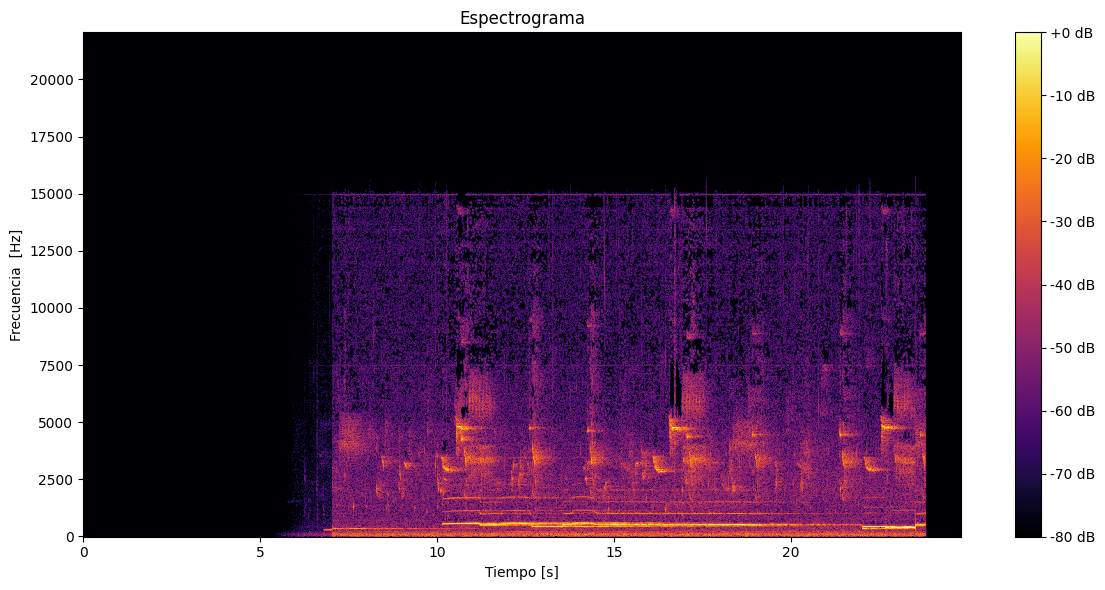

In [148]:

#Calculamos la STFT
lib = librosa.stft(data)

#Convertimos a escala logarítmica
libdB = librosa.amplitude_to_db(np.abs(lib))

#Graficamos el espectrograma
plt.figure(figsize=(12, 6))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='hz', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title("Espectrograma")
plt.xlabel("Tiempo [s]")
plt.ylabel("Frecuencia  [Hz]")
plt.tight_layout()
plt.show()

##Explicación
El hecho de que la señal comience a partir de los 5 segundos es porque en los primeros segundos no habia audio, debido a esto realice un skip, el motivo por el que decidi hacer esto en vez de simplemente recortar el audio fue para ver los efectos que tendria en la visualización de la señal en esta sección. En terminos tecnicos, el espectrograma muestra la variación de energía de la señal de audio respectro al tiempo y la frecuencia. dado el sonido que elegi, se suele ver que todas las frecuencias presentan cierto nivel de energia, pero la mayor concentración de energia se encuentra en las frecuencias bajas.

## 5. Slicing
Desarrolla un framento de código que te permita tomar una señal de audio y framentarla en N segmentos o slices. Debe asignar la longitud temporal de cada slice y el programa debe indicar el número de slices que quedan. Considera que al final puede quedar un slice de longitud diferente a todos los demas.

En el slicing debes también incluir un gap o overlap a lado y lado de cada uno de los fragmentos. Este overlap debe ser ajustable del número de muestras que constituyen dicho overlap.

<center><img src="../../assets/slices.png"/></center>


In [150]:

def sliceAudi(data, sample, durSlice, solapamientoM):
    """
    Divide una señal de audio en fragmentos (slices) con overlap ajustable.
    Parametros:

    data: La señal de audio
    totalM: Total de muestras de la señal
    sample: frecuencia de muestreo en Hz
    durSlice: duración de cada slice en segundos
    solapamientoM: numero de muestras de solapamiento
    """
    durSM = int(durSlice * sample) #Duración de las muestras del slice
    totalM = len(data)
    slices = []
    inicio = 0
    while inicio < totalM:
        start = max(0, inicio - solapamientoM)
        end = min(totalM, inicio + durSM + solapamientoM)

        sliceAudi = data[start:end]
        slices.append(sliceAudi)
        inicio += durSM

    print(f"Se generaron {len(slices)} slices.")

    return slices


#Parametros
durSlice = 0.2
solapamientoM = 1500
slices = sliceAudi(data, sample, durSlice, solapamientoM)


Se generaron 89 slices.


## 5.1 Slicing usando Pytorch de la señal obtenida en el primer punto.
Debes crear un array con los slices creados a partir de tensores en pytorch.
Grafica un par de tus slices y reproduce el audio.


Se generaron 9 slices.
El último slice tiene una longitud diferente.


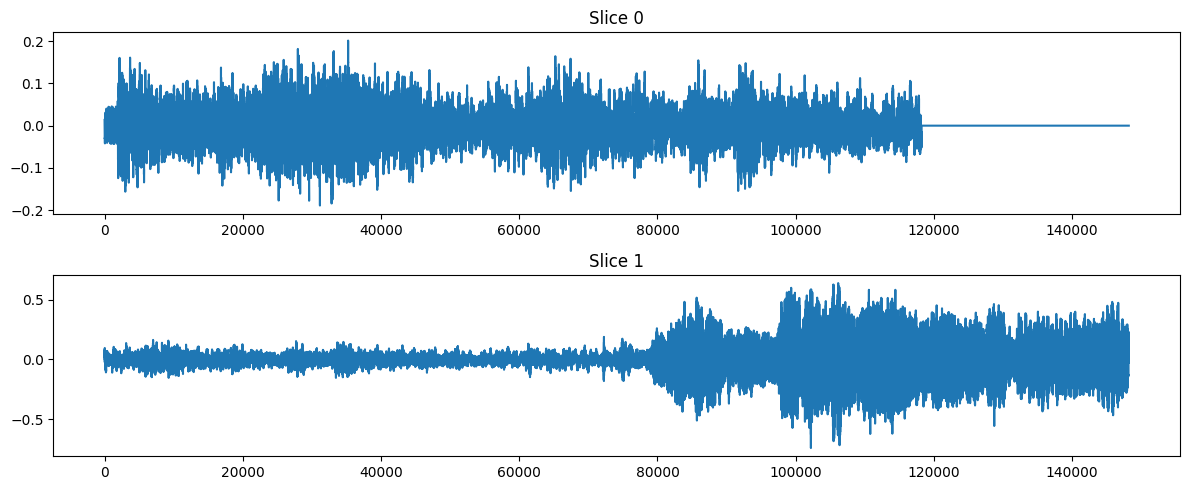

In [151]:
import torch

#Convertimos la data a tensor de PyTorch
torchick = torch.tensor(data, dtype=torch.float32)

#Definimos los parametros de slicing
tiempoSlice = 2  #Tiempo del slice en segundos
solapa = 30000 #Muestras

# Calcular muestras por slice y solapamiento en tiempo
muestrasSlice = int(tiempoSlice * sample)

slices2 = []  #Lista para almacenar los slices generados
ini = 0

#Generamos los slices con solapamiento
while ini < len(torchick):
    start = max(0, ini - solapa)
    end = min(len(torchick), ini + muestrasSlice + solapa)
    sliceTensor = torchick[start:end]
    slices2.append(sliceTensor)
    ini += muestrasSlice

print(f"Se generaron {len(slices2)} slices.")

#Si el último slice queda mas corto lo dejamos asi
if len(slices2[-1]) != (muestrasSlice + 2 * solapa):
    print("El último slice tiene una longitud diferente.")

#Usamos padding para igualar la longitud de los slices rellenando con ceros
maxLen = max([s.shape[0] for s in slices2])
slicesCero = torch.stack([
    torch.nn.functional.pad(s, (0, maxLen - s.shape[0]))
    for s in slices2
])

#Graficar el primer par de slices
plt.figure(figsize=(12, 5))
plt.subplot(2, 1, 1)
plt.plot(slicesCero[0].numpy())
plt.title("Slice 0")

plt.subplot(2, 1, 2)
plt.plot(slicesCero[1].numpy())
plt.title("Slice 1")
plt.tight_layout()
plt.show()

#Reproducimos los primeros dos slices
display(Audio(slicesCero[0].numpy(), rate=sample))
display(Audio(slicesCero[1].numpy(), rate=sample))


## 6. Filtro Butterworth para una señal de audio.
Diseña y aplica un filtro butterworth a tu señal de audio, para diferentes ordenes y niveles de rizado.
Muestra gráficos con las diferentes respuestas del filtro butterworth y explica el resultado.

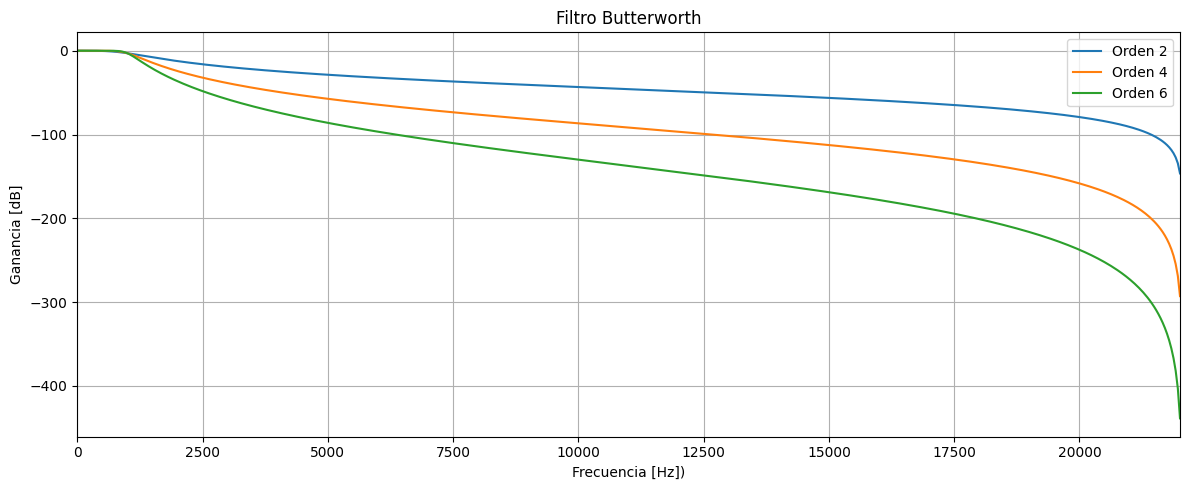

In [152]:
#Definimos el filtro butterworth
def filtroButterworth(data, sample, orden, fc, tipo='low'):
    b, a = butter(N=orden, Wn=fc, btype=tipo, fs=sample)
    filtrada = filtfilt(b, a, data)
    return filtrada, b, a

#Aplicamos filtros de distinto orden
filtros = [2, 4, 6]
fc = 1000  #Frecuencia de corte en Hz

#Graficamos la respuesta en frecuencia para distintos ordenes
plt.figure(figsize=(12, 5))
for orden in filtros:
    filtrada, b, a = filtroButterworth(data, sample, orden, fc)
    w, h = freqz(b, a, fs=sample)
    plt.plot(w, 20 * np.log10(abs(h)), label=f"Orden {orden}")

plt.title("Filtro Butterworth")
plt.xlabel("Frecuencia [Hz])")
plt.ylabel("Ganancia [dB]")
plt.grid()
plt.legend()
plt.tight_layout()
plt.xlim(w[0], w[-1])
plt.show()

Audio(filtrada, rate=sample)

##Explicación:
La ganancia disminuye a medida que aumentan las frecuencias, este comportamiento es común en los filtros pasabajos, esto se debe a que usamos type = low. Esta atenuación de la señal ocurre con el fin de eliminar el ruido y dejar solo la señal de audio con información relevante.


## 7. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/

    
[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Análisis espectral] https://currents.soest.hawaii.edu/ocn_data_analysis/_static/Spectrum.html


In [ ]:
#[Utilización de libreria librosa] https://librosa.org/doc/main/generated/librosa.display.specshow.html